In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("corrected_data.csv")
df

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind,Fire
0,1,76.490200,11.658135,8298,14917.0,6.469164,230,0
1,2,76.552283,11.738306,8939,15094.5,6.330219,220,0
2,3,76.651584,11.697461,4959,15150.0,6.382395,200,0
3,4,76.533187,11.723890,8284,14934.0,6.167960,230,0
4,5,76.617091,11.535475,8662,14903.0,5.638779,210,0
...,...,...,...,...,...,...,...,...
1295,1296,76.420177,11.645987,8300,14900.5,7.883348,230,0
1296,1297,76.539248,11.683239,8395,14905.5,6.888554,230,1
1297,1298,76.349314,11.568248,7150,14926.0,9.819245,210,0
1298,1299,76.440762,11.565806,7583,14893.5,7.743277,220,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OID_           1300 non-null   int64  
 1   Latitude       1300 non-null   float64
 2   Longitude      1300 non-null   float64
 3   NDVI           1300 non-null   int64  
 4   LST            1300 non-null   float64
 5   Precipitation  1300 non-null   float64
 6   Wind           1300 non-null   int64  
 7   Fire           1300 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 81.4 KB


In [4]:
df.describe()

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind,Fire
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,650.500000,76.533100,11.632975,7226.233077,15003.539615,7.192514,219.130769,0.113846
std,375.421985,0.114417,0.065692,1576.681541,142.538952,0.998386,15.495853,0.317747
min,1.000000,76.333745,11.516913,796.000000,14838.500000,5.592401,190.000000,0.000000
25%,325.750000,76.432573,11.577342,6555.250000,14894.500000,6.382395,200.000000,0.000000
50%,650.500000,76.536544,11.633731,7861.000000,14934.000000,7.029086,220.000000,0.000000
75%,975.250000,76.634688,11.688165,8325.000000,15094.500000,7.743277,230.000000,0.000000
max,1300.000000,76.747068,11.748242,9890.000000,15343.000000,10.572388,250.000000,1.000000


In [5]:
df.skew()

OID_             0.000000
Latitude        -0.014278
Longitude       -0.045623
NDVI            -1.353045
LST              0.904523
Precipitation    0.712943
Wind             0.135358
Fire             2.434323
dtype: float64

In [6]:
df.shape

(1300, 8)

In [7]:
df.isnull().sum()

OID_             0
Latitude         0
Longitude        0
NDVI             0
LST              0
Precipitation    0
Wind             0
Fire             0
dtype: int64

In [8]:
df.duplicated().sum()

0

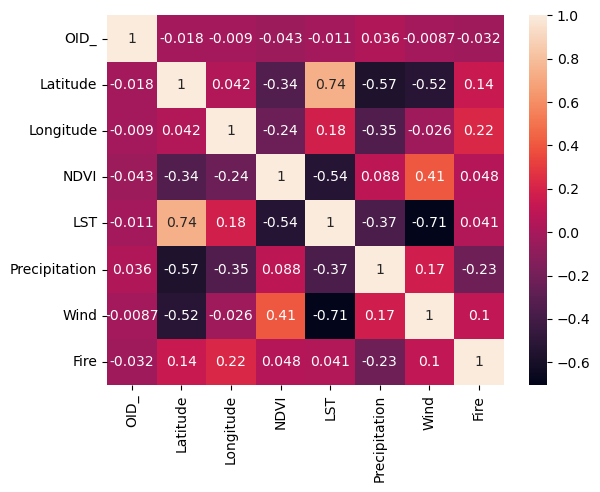

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

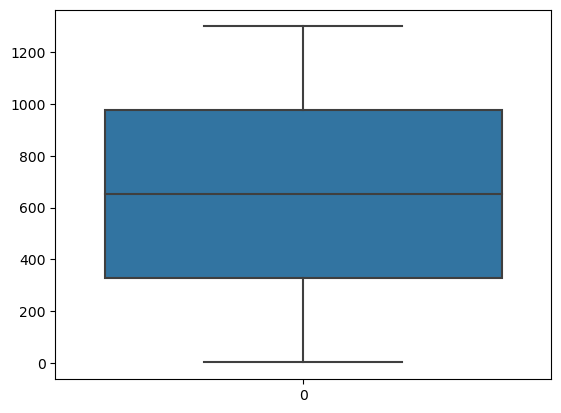

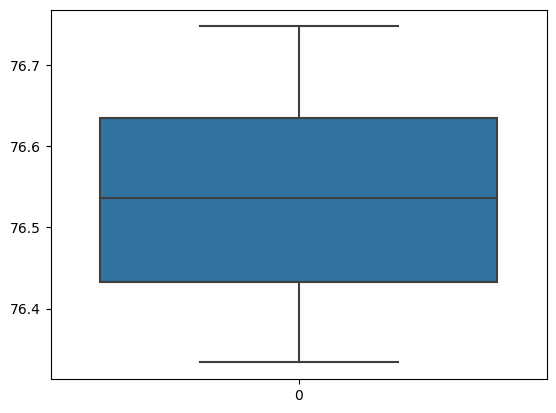

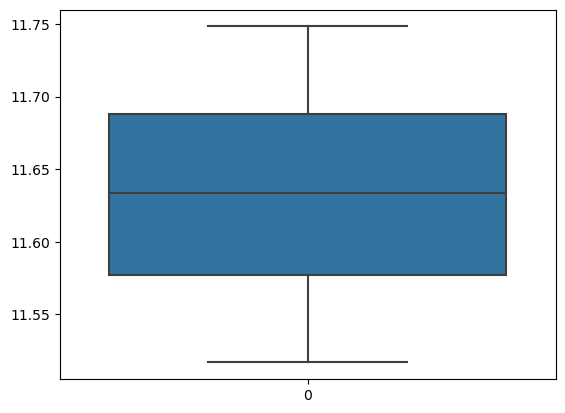

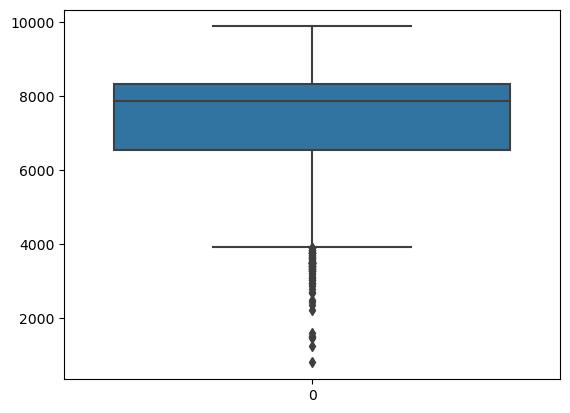

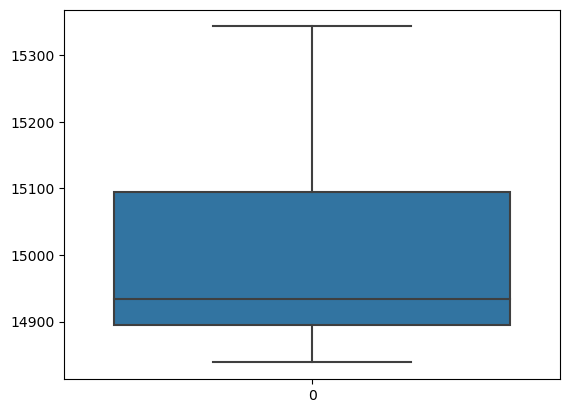

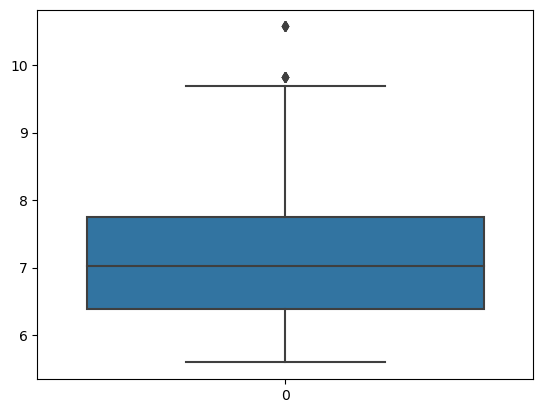

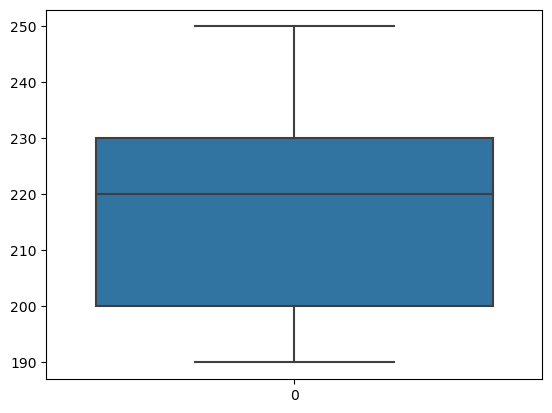

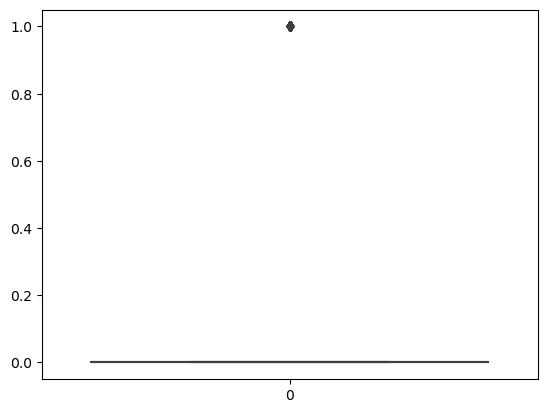

In [10]:
for col in df.select_dtypes(include=['int','float']):
     sns.boxplot(df[col])
     plt.show()

In [11]:
def remove_outlier(df):
    for col in numerical:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        df=df[(df[col]>upper_limit)&(df[col]<lower_limit)]
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
    return df

### Splitting the Data 

In [12]:
x=df.drop("Fire",axis=1)

In [13]:
y=df['Fire']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to your training data
classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

scaler=StandardScaler()
x_test_scaled=scaler.fit_transform(x_test)
x_train_scaled=scaler.transform(x_train)

In [16]:
x_train

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind
10,11,76.491316,11.654765,8133,14917.0,6.469164,230
147,148,76.617930,11.629656,8235,14884.0,7.658844,210
342,343,76.480286,11.607409,8772,14838.5,7.029086,240
999,1000,76.418299,11.527628,5394,15001.0,8.357499,210
811,812,76.427754,11.588703,9187,14845.5,7.743277,230
...,...,...,...,...,...,...,...
1095,1096,76.644173,11.702377,3649,15150.0,6.523833,200
1130,1131,76.566265,11.613945,8541,15065.0,7.685979,220
1294,1295,76.340797,11.720781,6561,14908.5,8.245896,240
860,861,76.715314,11.706181,3771,15316.0,6.838892,200


In [17]:
x_test

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind
478,479,76.393606,11.588623,6070,14867.5,9.684379,220
721,722,76.540655,11.635380,8465,14871.0,8.472587,230
312,313,76.549819,11.541117,8892,14875.0,7.496383,230
660,661,76.669256,11.737801,5083,15233.0,5.592401,210
823,824,76.663537,11.690081,5561,15150.0,6.382395,200
...,...,...,...,...,...,...,...
306,307,76.469046,11.652745,8371,14917.0,6.469164,230
199,200,76.486037,11.594697,7673,14838.5,7.441061,240
296,297,76.454814,11.614029,7900,14845.5,7.029086,230
286,287,76.571696,11.572024,8246,14952.5,7.158677,250


In [18]:
model_object=RandomForestClassifier()

In [19]:
model_object.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred=model_object.predict(x_test)

In [21]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Model Evaluation

In [22]:
y_train_pred=model_object.predict(x_train)

In [23]:
metrics.accuracy_score(y_test,y_pred)

0.9615384615384616

metrics.accuracy_score(y_train,y_train_pred)

In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       221
           1       0.97      0.77      0.86        39

    accuracy                           0.96       260
   macro avg       0.96      0.88      0.92       260
weighted avg       0.96      0.96      0.96       260



In [25]:
print(metrics.confusion_matrix(y_test,y_pred))

[[220   1]
 [  9  30]]


In [26]:
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

array([[220,   1],
       [  9,  30]], dtype=int64)

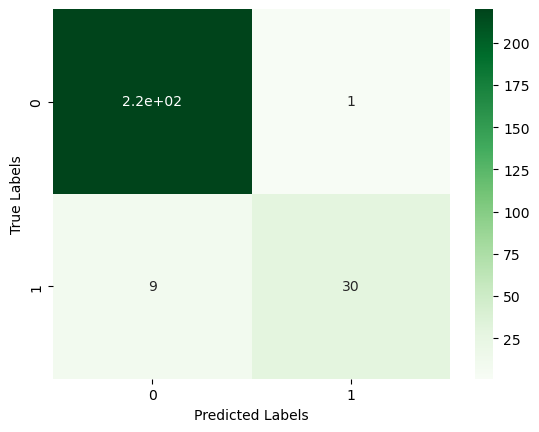

In [27]:
sns.heatmap(c_matrix,annot=True,cmap='Greens')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [28]:
import joblib
model_filename = "trained_model.joblib"
joblib.dump(RandomForestClassifier, model_filename)
print(f"Model saved to {model_filename}")

Model saved to trained_model.joblib


In [29]:
model_filename="trained_model.joblib"
model=joblib.load(model_filename)

In [30]:
new=pd.read_csv(r"C:\Users\Asus\Desktop\1500csv.csv")
new

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind
0,1,77.121697,8.760545,7961,14776.666667,2.090874,170
1,2,76.232037,11.559951,7503,14961.000000,0.000000,160
2,3,75.323985,12.152825,8234,15299.200000,0.000000,220
3,4,76.773775,9.120047,7222,15159.250000,1.611339,190
4,5,77.021116,9.727707,7629,14929.500000,0.000000,165
...,...,...,...,...,...,...,...
1465,1466,76.296865,11.627734,6054,15026.000000,0.000000,155
1466,1467,76.218801,11.316840,8224,15307.200000,0.000000,170
1467,1468,76.372016,9.661238,7627,15228.500000,0.000000,205
1468,1469,76.204320,11.513243,7666,14998.000000,0.000000,170


In [31]:
new.shape

(1470, 7)

In [32]:
x_train.shape

(1040, 7)

In [33]:
new.isnull().sum()

OID_             0
Latitude         0
Longitude        0
NDVI             0
LST              0
Precipitation    0
Wind             0
dtype: int64

In [34]:
x_train

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind
10,11,76.491316,11.654765,8133,14917.0,6.469164,230
147,148,76.617930,11.629656,8235,14884.0,7.658844,210
342,343,76.480286,11.607409,8772,14838.5,7.029086,240
999,1000,76.418299,11.527628,5394,15001.0,8.357499,210
811,812,76.427754,11.588703,9187,14845.5,7.743277,230
...,...,...,...,...,...,...,...
1095,1096,76.644173,11.702377,3649,15150.0,6.523833,200
1130,1131,76.566265,11.613945,8541,15065.0,7.685979,220
1294,1295,76.340797,11.720781,6561,14908.5,8.245896,240
860,861,76.715314,11.706181,3771,15316.0,6.838892,200


In [35]:
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)
x_train_scaled = scaler.transform(x_train)


In [36]:
import pandas as pd

# Convert the NumPy array to a DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)


In [37]:
# Assuming you have a trained model named 'model_object' and 'test_data' is your test feature data
test_data = new[x_train_scaled_df.columns]
predictions = model_object.predict(test_data)


In [38]:
test_data = new[x_train.columns]
predictions = model_object.predict(test_data)

In [39]:
x_train_scaled_df

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind
0,-1.715544,-0.375860,0.226936,0.587132,-0.642593,-0.676307,0.784535
1,-1.338752,0.692436,-0.148977,0.649771,-0.872095,0.441312,-0.518846
2,-0.802443,-0.468932,-0.482050,0.979547,-1.188530,-0.150300,1.436226
3,1.004506,-0.991941,-1.676504,-1.094909,-0.058405,1.097648,-0.518846
4,0.487449,-0.912160,-0.762117,1.234402,-1.139847,0.520630,0.784535
...,...,...,...,...,...,...,...
1035,1.268535,0.913854,0.939776,-2.166528,0.977832,-0.624949,-1.170536
1036,1.364795,0.256516,-0.384197,0.837688,0.386690,0.466803,0.132845
1037,1.815845,-1.645858,1.215307,-0.378246,-0.701707,0.992805,1.436226
1038,0.622214,1.514104,0.996716,-2.091607,2.132297,-0.328974,-1.170536


In [40]:
len(predictions)

1470

In [41]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
predictions_df = pd.DataFrame({'Predicted_Fire': predictions})

In [43]:
predictions_df

,Predicted_Fire
0,0
1,0
2,0
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [44]:
fire_df=pd.concat([new,predictions_df],axis=1)
fire_df

,OID_,Latitude,Longitude,NDVI,LST,Precipitation,Wind,Predicted_Fire
0,1,77.121697,8.760545,7961,14776.666667,2.090874,170,0
1,2,76.232037,11.559951,7503,14961.000000,0.000000,160,0
2,3,75.323985,12.152825,8234,15299.200000,0.000000,220,0
3,4,76.773775,9.120047,7222,15159.250000,1.611339,190,0
4,5,77.021116,9.727707,7629,14929.500000,0.000000,165,0
...,...,...,...,...,...,...,...,...
1465,1466,76.296865,11.627734,6054,15026.000000,0.000000,155,0
1466,1467,76.218801,11.316840,8224,15307.200000,0.000000,170,0
1467,1468,76.372016,9.661238,7627,15228.500000,0.000000,205,0
1468,1469,76.204320,11.513243,7666,14998.000000,0.000000,170,0


In [45]:
fire_df.to_csv('New_predicted_f1500.csv')